# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from citipy import citipy
from api_keys import weather_api_key
from datetime import date
import time

# Define today's date
today = date.today()

## Generate Cities List

In [2]:
# Generate 1,500 latitudes and longitudes using random number generator
cities_df = pd.DataFrame({"Long":(np.random.uniform(-1.8,1.8,1500)*100), "Lat":(np.random.uniform(-0.9,0.9,1500)*100)})

# Create empty list for city names
city_names = []
countries = []

# Use Citipy to identify city closest to each latitude and longtitude
for i in range(0,len(cities_df["Lat"])):
    lat = cities_df.iloc[i]["Lat"]
    long = cities_df.iloc[i]["Long"]
    city = citipy.nearest_city(lat,long)
    name = city.city_name
    city_names.append(name)
    country = city.country_code
    countries.append(country)
    
# Add city names list to data frame
cities_df["City"] = city_names
cities_df["Country"] = countries

# Remove duplicate cities, reset index, and display data frame
cities_df = cities_df.drop_duplicates(subset=["City"])
cities_df = cities_df.reset_index(drop=True)
cities_df

,Long,Lat,City,Country
0,81.490797,43.088152,yining,cn
1,-33.474031,46.045708,lagoa,pt
2,42.433499,-14.020147,nacala,mz
3,-98.418481,-7.612467,puerto ayora,ec
4,-166.222964,-85.698294,mataura,pf
...,...,...,...,...
619,26.531423,38.226328,cesme,tr
620,43.858135,28.315028,buraydah,sa
621,158.021323,-5.789339,kieta,pg
622,96.986698,49.625171,kungurtug,ru


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create empty list for weather
cities_clean = []
country_clean = []
lat_clean = []
lon_clean = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
date = []

# Print first lines of print log
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for i in range(0,len(cities_df["Lat"])):
   
    # Grab city name and country code from data frame to use in URL
    # Delay running the function by 1.1 seconds per line to stay within API limits
    time.sleep(1.1)
    city_name = cities_df.iloc[i]["City"]
    country_code = cities_df.iloc[i]["Country"]
    
    # Build URL for current city
    response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&units=imperial&appid={weather_api_key}").json()
    
    # Add temperature information to lists; also skip cities that cannot be found
    try:
        cities_clean.append(response['name'])
        country_clean.append(response['sys']["country"])
        lat_clean.append(response['coord']['lat'])
        lon_clean.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']["all"])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        # Print city names that could be found
        print(f"Processing record {i} | {city_name}")
        
    except:
        
        # Print error message when city was not found
        print("City not found. Skipping to next record.")

# Print final lines of print log
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 0 | yining
Processing record 1 | lagoa
Processing record 2 | nacala
Processing record 3 | puerto ayora
City not found. Skipping to next record.
Processing record 5 | tarakan
Processing record 6 | merauke
City not found. Skipping to next record.
Processing record 8 | mayo
Processing record 9 | vaini
Processing record 10 | yulara
Processing record 11 | hermanus
Processing record 12 | kununurra
Processing record 13 | kuandian
Processing record 14 | tuktoyaktuk
Processing record 15 | ushuaia
Processing record 16 | shetpe
Processing record 17 | punta arenas
Processing record 18 | riviere-du-loup
Processing record 19 | rikitea
Processing record 20 | riyadh
Processing record 21 | beidao
Processing record 22 | kodiak
Processing record 23 | puerto madryn
Processing record 24 | kapaa
Processing record 25 | harsud
Processing record 26 | opuwo
Processing record 27 | atuona
Processing record 28 | 

Processing record 241 | espanola
Processing record 242 | nerchinskiy zavod
Processing record 243 | klaksvik
Processing record 244 | ponta do sol
Processing record 245 | hue
City not found. Skipping to next record.
Processing record 247 | atar
Processing record 248 | provideniya
City not found. Skipping to next record.
Processing record 250 | minab
Processing record 251 | oriximina
Processing record 252 | victor harbor
Processing record 253 | agidel
Processing record 254 | paamiut
Processing record 255 | pevek
Processing record 256 | nicoya
City not found. Skipping to next record.
City not found. Skipping to next record.
City not found. Skipping to next record.
Processing record 260 | samarai
City not found. Skipping to next record.
Processing record 262 | omboue
Processing record 263 | camacha
Processing record 264 | banda aceh
Processing record 265 | vila velha
Processing record 266 | sisimiut
Processing record 267 | turan
Processing record 268 | cimahi
Processing record 269 | shitanj

Processing record 483 | tautira
Processing record 484 | paka
Processing record 485 | marabba
Processing record 486 | beira
Processing record 487 | mehriz
Processing record 488 | prince rupert
Processing record 489 | wau
Processing record 490 | penzance
Processing record 491 | mossendjo
Processing record 492 | muzhi
Processing record 493 | acarau
Processing record 494 | kamaishi
Processing record 495 | honningsvag
Processing record 496 | sabang
Processing record 497 | byron bay
Processing record 498 | kedungwaru
Processing record 499 | san cristobal
Processing record 500 | brae
Processing record 501 | kropotkin
City not found. Skipping to next record.
Processing record 503 | cabedelo
Processing record 504 | pangody
Processing record 505 | sosnovo-ozerskoye
Processing record 506 | wamba
City not found. Skipping to next record.
Processing record 508 | port lincoln
Processing record 509 | shakawe
Processing record 510 | mendi
Processing record 511 | port macquarie
Processing record 512 | w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# create and display a data frame from the weather records of found cities
weather_dict = {
    "City": cities_clean,
    "Country": country_clean,
    "Latitude": lat_clean,
    "Longitude": lon_clean,
    "Max Temp (F)": temperature,
    "Humidity %": humidity,
    "Cloudiness %": cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

# Export city data as a CSV
weather_data.to_csv("Output/Weather_Data.csv", index=False, header=True)

In [5]:
weather_data.describe()

,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,17.571075,22.329731,61.509803,72.487455,53.150538,8.042007,1.603055e+09
std,33.453238,88.798633,19.787249,20.340875,39.133417,5.485754,2.341327e+02
min,-54.800000,-175.200000,7.120000,9.000000,0.000000,0.340000,1.603054e+09
25%,-8.935000,-53.947500,45.110000,63.000000,11.500000,3.865000,1.603055e+09
50%,18.735000,26.870000,65.815000,77.000000,62.500000,6.930000,1.603055e+09
75%,46.140000,102.657500,77.967500,87.000000,90.000000,11.410000,1.603055e+09
max,78.220000,179.320000,99.000000,100.000000,100.000000,36.860000,1.603055e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
weather_data = weather_data[weather_data["Humidity %"] <= 100]
weather_data

,City,Country,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Date
0,Yining,CN,29.04,114.56,55.92,89,99,1.03,1603054376
1,Lagoa,PT,39.05,-27.98,62.89,73,54,21.41,1603054377
2,Nacala,MZ,-14.54,40.67,71.55,87,0,3.20,1603054378
3,Puerto Ayora,EC,-0.74,-90.35,80.60,65,20,23.04,1603054380
4,Tarakan,ID,3.30,117.63,79.70,85,100,7.72,1603054382
...,...,...,...,...,...,...,...,...,...
553,Çeşme,TR,38.32,26.31,62.60,77,20,1.12,1603055139
554,Buraidah,SA,26.33,43.98,73.40,23,0,4.70,1603055140
555,Kieta,PG,-6.22,155.63,81.39,75,84,1.39,1603055142
556,Kungurtug,RU,50.60,97.52,30.06,84,97,1.81,1603055143


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The below graph shows the relationship between a city's latitude and its temperature.
For our initial conjecture (that the earth is warmer near the equater) to be true
we would expect to see warmer temperatures near the equator (0' latitude) and cooler
temperatures as the latitude's absolute value increases.


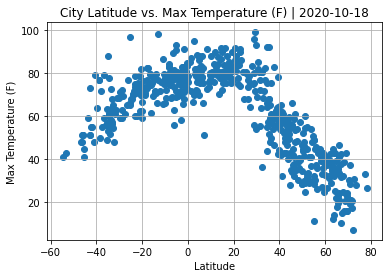

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (F) | {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Explain what the code is analyzing
print("The below graph shows the relationship between a city's latitude and its temperature.")
print("For our initial conjecture (that the earth is warmer near the equater) to be true")
print("we would expect to see warmer temperatures near the equator (0' latitude) and cooler")
print("temperatures as the latitude's absolute value increases.")

# Save the figure
plt.savefig("Images/Latitude_VS_Temperature.png")

## Latitude vs. Humidity Plot

The below graph shows the relationship between a city's latitude and its humidity.
Humidity measures the concentration of moisture in the air, which is not generally
believed to be related to latitude.


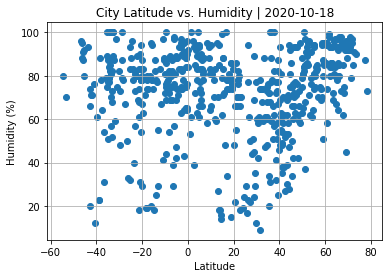

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity %"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity | {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Explain what the code is analyzing
print("The below graph shows the relationship between a city's latitude and its humidity.")
print("Humidity measures the concentration of moisture in the air, which is not generally")
print("believed to be related to latitude.")

# Save the figure
plt.savefig("Images/Latitude_VS_Humidity.png")

## Latitude vs. Cloudiness Plot

The below graph shows the relationship between a city's latitude and its cloudiness.
Cloudiness is not generally believed to be related to latitude.


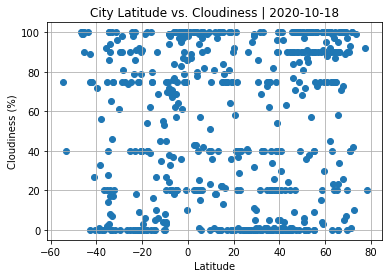

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness %"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness | {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Explain what the code is analyzing
print("The below graph shows the relationship between a city's latitude and its cloudiness.")
print("Cloudiness is not generally believed to be related to latitude.")

# Save the figure
plt.savefig("Images/Latitude_VS_Cloudiness.png")

## Latitude vs. Wind Speed Plot

The below graph shows the relationship between a city's latitude and its wind speed.
Wind speed is not generally believed to be related to latitude.


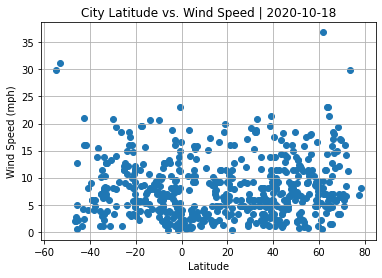

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed | {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Explain what the code is analyzing
print("The below graph shows the relationship between a city's latitude and its wind speed.")
print("Wind speed is not generally believed to be related to latitude.")

# Save the figure
plt.savefig("Images/Latitude_VS_Wind Speed.png")

## Linear Regression

In [11]:
# Pull cities in the northern hemisphere into a new data frame
cities_north_df = weather_data[weather_data["Latitude"] >= 0]
cities_north_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Date
0,Yining,29.04,114.56,55.92,89,99,1.03,1603054376
1,Lagoa,39.05,-27.98,62.89,73,54,21.41,1603054377
4,Tarakan,3.30,117.63,79.70,85,100,7.72,1603054382
6,Mayo,63.59,-135.90,12.20,72,75,4.70,1603054386
11,Kuandian,40.73,124.78,42.03,63,0,2.30,1603054392


In [12]:
# Pull cities in the souther hemisphere into a new data frame
cities_south_df = weather_data[weather_data["Latitude"] < 0]
cities_south_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Date
2,Nacala,-14.54,40.67,71.55,87,0,3.20,1603054378
3,Puerto Ayora,-0.74,-90.35,80.60,65,20,23.04,1603054380
5,Merauke,-8.47,140.33,78.46,82,99,10.04,1603054383
7,Vaini,-21.20,-175.20,71.60,83,75,14.81,1603054387
8,Yulara,-25.24,130.99,66.20,93,90,11.41,1603054388


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8751573194368458


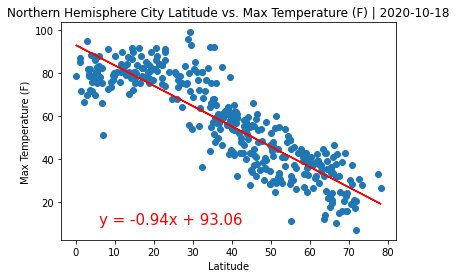

In [13]:
# Build a scatter plot for each data type
plt.scatter(cities_north_df["Latitude"], cities_north_df["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature (F) | {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_north_df["Latitude"]
y_values = cities_north_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/NH_Latitude_VS_Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.688730267785303


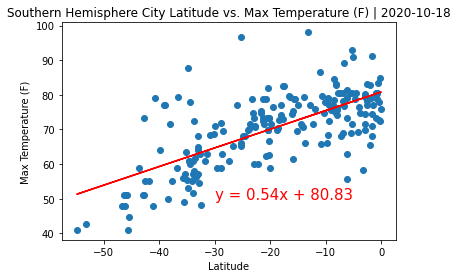

In [14]:
# Build a scatter plot for each data type
plt.scatter(cities_south_df["Latitude"], cities_south_df["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature (F) | {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_south_df["Latitude"]
y_values = cities_south_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/SH_Latitude_VS_Temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23119721751118935


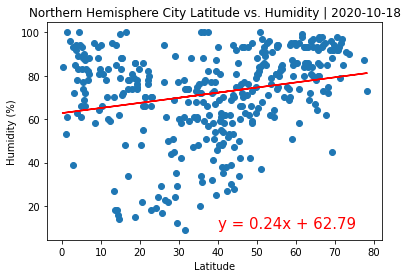

In [15]:
# Build a scatter plot for each data type
plt.scatter(cities_north_df["Latitude"], cities_north_df["Humidity %"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere City Latitude vs. Humidity | {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_north_df["Latitude"]
y_values = cities_north_df["Humidity %"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/NH_Latitude_VS_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.050464661199045996


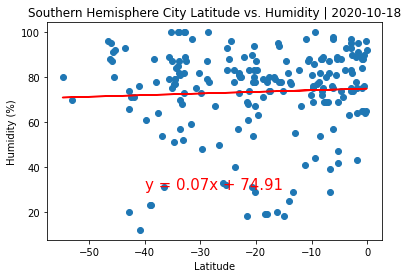

In [16]:
# Build a scatter plot for each data type
plt.scatter(cities_south_df["Latitude"], cities_south_df["Humidity %"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere City Latitude vs. Humidity | {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_south_df["Latitude"]
y_values = cities_south_df["Humidity %"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/SH_Latitude_VS_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11902536978192806


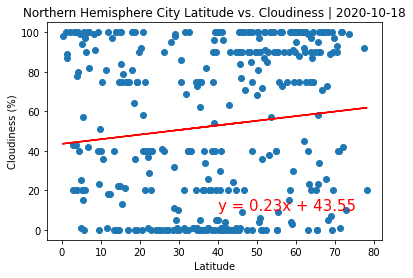

In [17]:
# Build a scatter plot for each data type
plt.scatter(cities_north_df["Latitude"], cities_north_df["Cloudiness %"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness | {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_north_df["Latitude"]
y_values = cities_north_df["Cloudiness %"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/NH_Latitude_VS_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12849111839484845


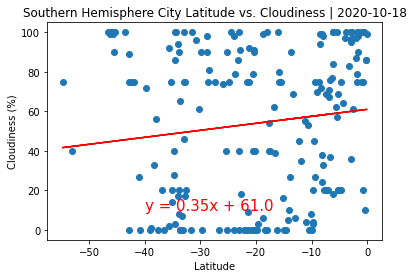

In [18]:
# Build a scatter plot for each data type
plt.scatter(cities_south_df["Latitude"], cities_south_df["Cloudiness %"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness | {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_south_df["Latitude"]
y_values = cities_south_df["Cloudiness %"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/SH_Latitude_VS_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.20784205577323261


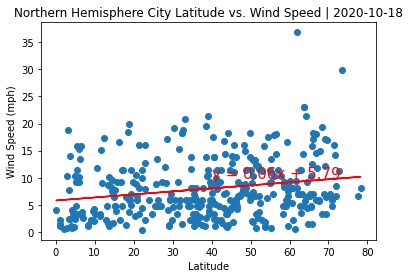

In [19]:
# Build a scatter plot for each data type
plt.scatter(cities_north_df["Latitude"], cities_north_df["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed | {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_north_df["Latitude"]
y_values = cities_north_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/NH_Latitude_VS_Wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11283217093074281


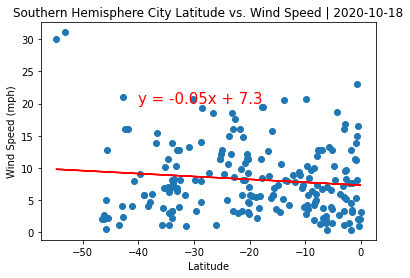

In [20]:
# Build a scatter plot for each data type
plt.scatter(cities_south_df["Latitude"], cities_south_df["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed | {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_south_df["Latitude"]
y_values = cities_south_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/SH_Latitude_VS_Wind.png")

## Final Observations

1. Of the four weather points analyzed, temperature has the strongest correlation to latitude (as shown by r-value's closest to 1 or -1). In this case, both show that the temperature gets warmer as you move closer to the equator. This is shown by a strong negative correlation in the northern hemisphere (as latitude goes up, temperature goes down) and a strong positive correlation in the southern hemisphere (as latitude goes up, temperature goes up).
2. There appears to be no correlation between latitude and neither humidity nor cloudiness for either hemisphere. Both humidity and cloudiness are related closely with moisture in the air, so this is not a surprising result.
3. Finally, our data shows no correlation between latitude and wind speed for the northern hemisphere; however, while there also appears to be no correlation between latitude and wind speed in the southern hemisphere, it is right on the cusp of a weak correlation. Because the wind speed changes daily and the random city generator will always provide a new list of cities to sample, latitude vs. wind speed should be tested on more dates before determining the possibility of correlation.